<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/TMNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib wordcloud nltk scikit-learn

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Read text data from a file
file_path = '/content/drive/MyDrive/Springboard_Python/Textdata.txt'  # Change this to your file path
with open(file_path, 'r') as file:
    text_data = file.read()

# Clean the text data
import re
text_data = text_data.lower()  # Convert to lowercase
text_data = re.sub(r'[^\w\s]', '', text_data)  # Remove punctuation
text_data = re.sub(r'\(.*?\)', '', text_data)  # Remove parentheses

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Tokenize the text data and count word frequencies
tokens = word_tokenize(text_data)
tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Find words with minimum frequency of 6
words_min_freq_6 = {word: count for word, count in word_counts.items() if count >= 6}
print(words_min_freq_6)

{'like': 7, 'dont': 7, 'film': 10, 'even': 6, 'make': 7, 'movie': 6}


In [ ]:
# Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_tokens)

# Calculate correlations
import numpy as np
correlation_matrix = (X.T * X).toarray()
word_index = vectorizer.vocabulary_.get('film')

if word_index is not None:
    word_correlations = np.corrcoef(correlation_matrix)[word_index]
    correlated_words = {word: correlation for word, correlation in zip(vectorizer.get_feature_names_out(), word_correlations) if correlation >= 0.35 and word != 'film'}
    print(correlated_words)
else:
    print("The word 'film' is not in the vocabulary.")

{}


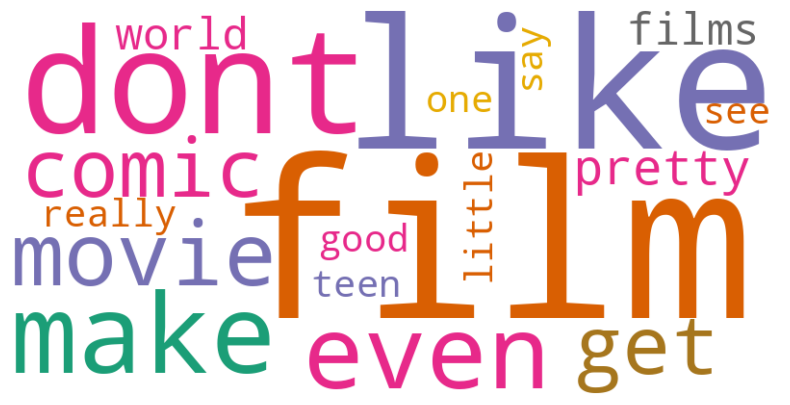

In [ ]:
# Filter words with minimum frequency 4
words_min_freq_4 = {word: count for word, count in word_counts.items() if count >= 4}

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(words_min_freq_4)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Analyze sentiments
from textblob import TextBlob

# Assuming sentiments are 'sarcasm', 'very negative', and 'very positive'
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 'Very Positive'
    elif analysis.sentiment.polarity < -0.5:
        return 'Very Negative'
    elif 'sarcasm' in text:
        return 'Sarcasm'
    else:
        return 'Neutral'

# Apply sentiment analysis to each line
sentiments = [analyze_sentiment(line) for line in text_data.split('\n')]

# Count lines with specific sentiments
sarcasm_lines = sentiments.count('Sarcasm')
very_negative_lines = sentiments.count('Very Negative')
very_positive_lines = sentiments.count('Very Positive')

print(f"Sarcasm lines: {sarcasm_lines}")
print(f"Very Negative lines: {very_negative_lines}")
print(f"Very Positive lines: {very_positive_lines}")

Sarcasm lines: 0
Very Negative lines: 1
Very Positive lines: 1


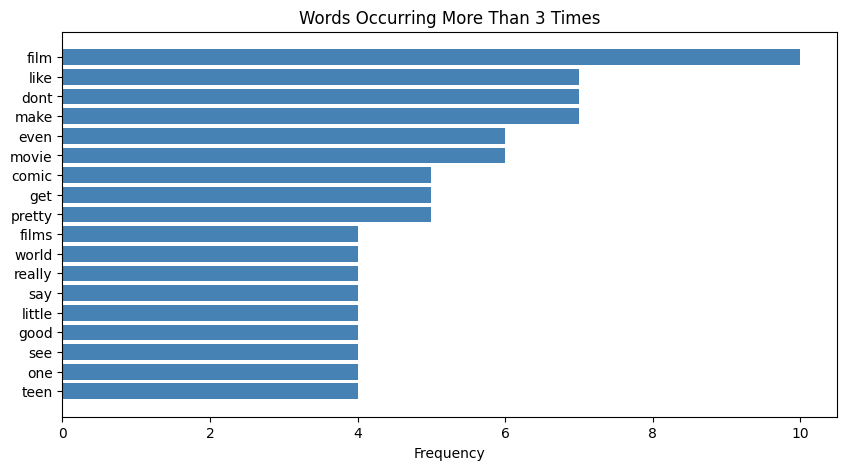

In [ ]:
# Filter words occurring more than 3 times
words_more_than_3 = {word: count for word, count in word_counts.items() if count > 3}

# Plot the graph
sorted_words = sorted(words_more_than_3.items(), key=lambda item: item[1], reverse=True)
words, counts = zip(*sorted_words)

plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='steelblue')
plt.xlabel('Frequency')
plt.title('Words Occurring More Than 3 Times')
plt.gca().invert_yaxis()
plt.show()